## Vaccination Data by County, NJ

In [243]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key

In [215]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
#d_state_covid.head()
len(d_state_covid)

11319

In [244]:
#getting columns needed for vaccination data
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])
clean_vaccine_df.head()
#clean_vaccine_df.dtypes
#len(clean_vaccine_df)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


## Population Data by County, NJ

In [264]:
population_url ="https://api.covidactnow.org/v2/county/NJ.json?apiKey=" + v_key
population_response = requests.get(population_url).json()
#getting population data
fips=[]
population = []

for county_row in population_response:
    fips.append(int(county_row['fips']))
    population.append(county_row['population'])
    
population_dict = {
     "fips": fips,
     "Total Population": population}
    
population_data_total  = pd.DataFrame(population_dict)
population_data_total.head()


,fips,Total Population
0,34001,263670
1,34003,932202
2,34005,445349
3,34007,506471
4,34009,92039


In [277]:
# merging vaccination data with population
vaccines_mer_pd = clean_vaccine_df.merge(population_data_total, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670
1,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670
2,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670
3,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670
4,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670


## Vaccination % Population By County, NJ 

In [350]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine["Percent completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent of Cases/Total Population"] =vaccines_mer_pd['actuals.cases']/vaccines_mer_pd["Total Population"]*100 
percent_counties_vaccine.round(decimals=2)


,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
0,2021-02-18,34001,Atlantic County,5.35,13.32,9.04
1,2021-02-19,34001,Atlantic County,5.58,13.40,9.07
2,2021-02-20,34001,Atlantic County,5.69,13.42,9.12
3,2021-02-21,34001,Atlantic County,6.03,13.72,9.15
4,2021-02-22,34001,Atlantic County,6.29,13.79,9.18
...,...,...,...,...,...,...
2887,2021-07-08,34041,Warren County,44.49,48.75,9.55
2888,2021-07-09,34041,Warren County,44.54,48.80,9.56
2889,2021-07-10,34041,Warren County,44.62,48.87,9.56
2890,2021-07-11,34041,Warren County,44.71,48.93,9.56


In [358]:
#Date - Jun 2021 when data from all counties are available
Data_date = "2021-06-26"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percent completed'], ascending =False)
percent_vaccine_round= percent_vaccine.round(decimals=2)
percent_vaccine_round


,date,fips,county,Percent completed,Percent initiated,Percent of Cases/Total Population
1902,2021-06-26,34027,Morris County,61.02,67.34,10.24
2456,2021-06-26,34035,Somerset County,60.29,67.87,9.19
669,2021-06-26,34009,Cape May County,56.17,61.01,10.09
263,2021-06-26,34003,Bergen County,55.75,61.82,11.25
1627,2021-06-26,34023,Middlesex County,54.32,61.95,11.23
1348,2021-06-26,34019,Hunterdon County,53.79,61.39,7.94
1486,2021-06-26,34021,Mercer County,53.14,61.42,9.30
392,2021-06-26,34005,Burlington County,53.06,57.84,9.96
1764,2021-06-26,34025,Monmouth County,52.98,59.00,12.28
533,2021-06-26,34007,Camden County,50.90,56.66,11.04


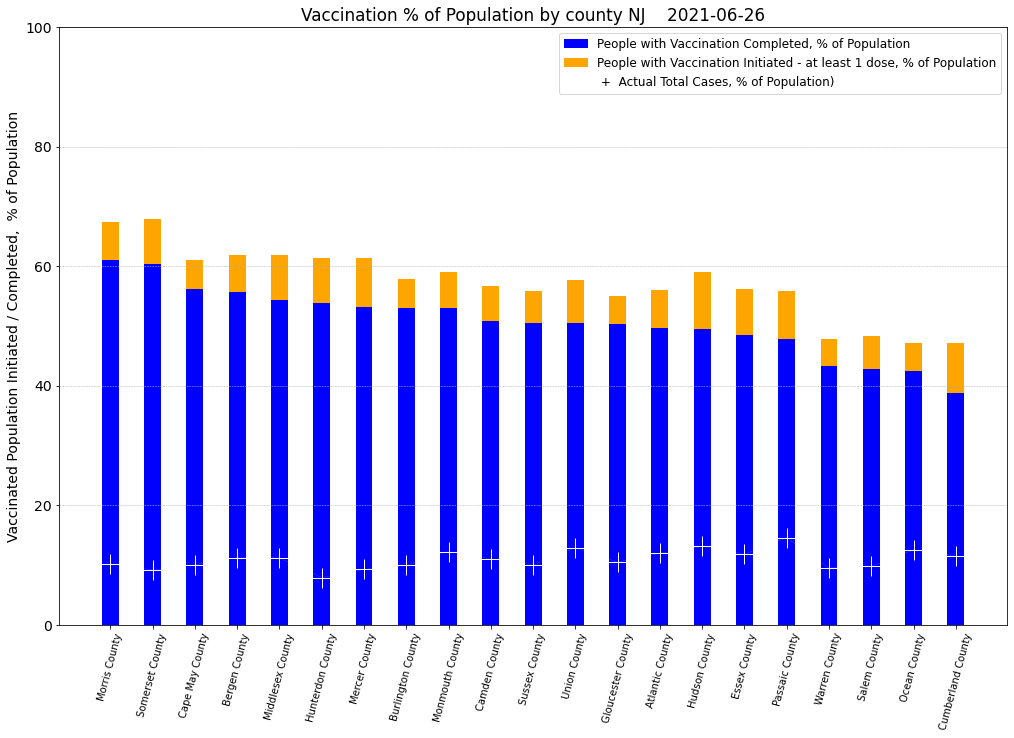

In [359]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['People with Vaccination Completed, % of Population','People with Vaccination Initiated - at least 1 dose, % of Population',
           ' +  Actual Total Cases, % of Population)']
dataset = [percent_vaccine["Percent completed"],percent_vaccine["Percent initiated"]]
X_AXIS = percent_vaccine_round["county"]
Y_AXIS = percent_vaccine_round["Percent of Cases/Total Population"]

matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 14})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17.0, 11.0)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.4
 
p1 = plt.bar(ind, dataset[0], width, color='blue')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='orange')
p =  plt.plot(X_AXIS,Y_AXIS, color = "white", marker = '+', ms= 20, mfc = "r", linewidth = 0.1) 

plt.ylim([0,100])
plt.yticks(fontsize=14)
plt.ylabel("Vaccinated Population Initiated / Completed,  % of Population", fontsize=14)
plt.xticks(ind, X_AXIS, fontsize=10, rotation=75)
plt.title("Vaccination % of Population by county NJ    "  +  (Data_date))
plt.legend((p1[0], p2[0], p[0]), (header[0], header[1], header[2]), fontsize=12)
plt.grid(axis = "y", linestyle = "--", linewidth = 0.5)
plt.savefig("../Images/Vaccination_counties_NJ_Jun2021.png")

plt.show()



## Vaccination - Daily Cases, February 2021 - July 2021, by County NJ
* time frame was adjusted to data, as when available for all counties in NJ 

In [306]:
#adding daily number of vaccination_initiated cases and vaccination_completed cases 
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
time_vaccine_df["delta_complete"]=time_vaccine_df['actuals.vaccinationsCompleted'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0]=0
index_county_df.loc[index_county_df['delta_complete'] <0]=0
index_county_df.head()
n_county_vaccine_df = index_county_df.drop(columns = ['actuals.deaths','actuals.vaccinesAdministered','actuals.newDeaths'])
n_county_vaccine_df.head()

,date,county,fips,actuals.cases,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,Total Population,delta_init,delta_complete
county,,,,,,,,,,
Atlantic County,2021-02-18,Atlantic County,34001,23833.0,153.0,35117.0,14104.0,263670,0.0,0.0
Atlantic County,2021-02-19,Atlantic County,34001,23909.0,76.0,35322.0,14712.0,263670,205.0,608.0
Atlantic County,2021-02-20,Atlantic County,34001,24048.0,139.0,35390.0,15004.0,263670,68.0,292.0
Atlantic County,2021-02-21,Atlantic County,34001,24131.0,83.0,36181.0,15890.0,263670,791.0,886.0
Atlantic County,2021-02-22,Atlantic County,34001,24207.0,76.0,36371.0,16576.0,263670,190.0,686.0


In [305]:
nc_vaccine_df = n_county_vaccine_df.rename(columns={'county':'County','date':'Date','fips':'Fips','actuals.vaccinationsInitiated':'Vaccination Initiated','actuals.vaccinationsCompleted':'Vaccination Completed',
                               'delta_init':'Vaccination Iniciated by Day','delta_complete': 'Vaccination Completed by day','actuals.cases':'Total New Cases','actuals.newCases':'Daily Cases', 
                               'Total Population':'Total Population'})
nc_vaccine_df.head()


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Atlantic County,2021-02-18,Atlantic County,34001,23833.0,153.0,35117.0,14104.0,263670,0.0,0.0
Atlantic County,2021-02-19,Atlantic County,34001,23909.0,76.0,35322.0,14712.0,263670,205.0,608.0
Atlantic County,2021-02-20,Atlantic County,34001,24048.0,139.0,35390.0,15004.0,263670,68.0,292.0
Atlantic County,2021-02-21,Atlantic County,34001,24131.0,83.0,36181.0,15890.0,263670,791.0,886.0
Atlantic County,2021-02-22,Atlantic County,34001,24207.0,76.0,36371.0,16576.0,263670,190.0,686.0


In [321]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= nc_vaccine_df.loc[nc_vaccine_df ['County'] == "Morris County"]
county_x.head()


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Morris County,2021-02-19,Morris County,34027,36077.0,179.0,77921.0,38427.0,491845,898.0,2439.0
Morris County,2021-02-20,Morris County,34027,36220.0,143.0,78499.0,39229.0,491845,578.0,802.0
Morris County,2021-02-21,Morris County,34027,36343.0,123.0,79729.0,41080.0,491845,1230.0,1851.0
Morris County,2021-02-22,Morris County,34027,36515.0,172.0,82667.0,42928.0,491845,2938.0,1848.0
Morris County,2021-02-23,Morris County,34027,36691.0,176.0,85213.0,44157.0,491845,2546.0,1229.0


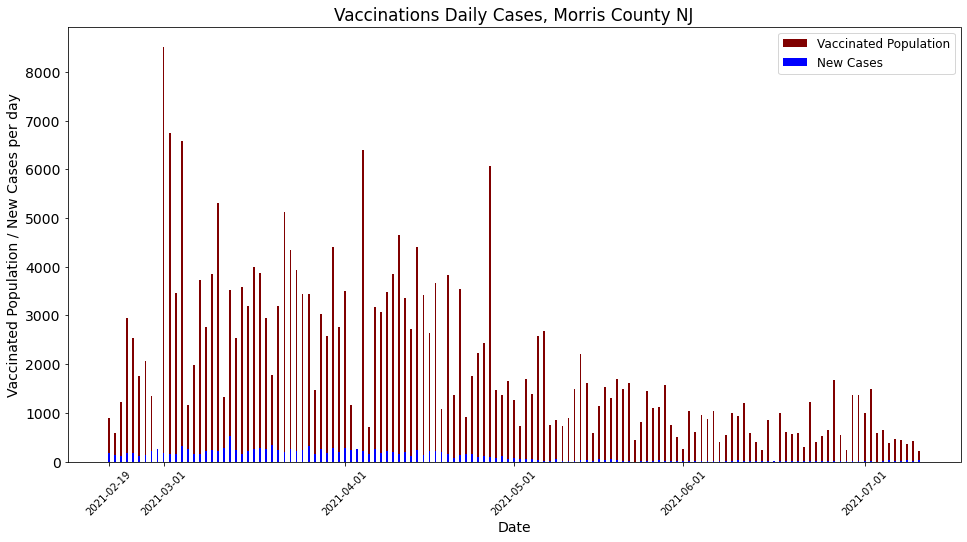

In [331]:
x_axis = county_x["Date"]
values = county_x['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_M = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_M = plt.bar(x_axis, county_x['Daily Cases'], color ='blue', width = 0.3)
  
plt.xlabel("Date")
plt.ylabel("Vaccinated Population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Morris County NJ")
plt.legend((p1_M[0], p2_M[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)

plt.savefig("../Images/Vaccinaction_Morris.png")

plt.show()

In [344]:
county_y=nc_vaccine_df .loc[nc_vaccine_df ['County'] == "Cumberland County"]
county_y


,Date,County,Fips,Total New Cases,Daily Cases,Vaccination Initiated,Vaccination Completed,Total Population,Vaccination Iniciated by Day,Vaccination Completed by day
county,,,,,,,,,,
Cumberland County,2021-02-19,Cumberland County,34011,13871.0,48.0,15561.0,6879.0,149527,118.0,164.0
Cumberland County,2021-02-20,Cumberland County,34011,13938.0,67.0,15616.0,6987.0,149527,55.0,108.0
Cumberland County,2021-02-21,Cumberland County,34011,13955.0,17.0,15712.0,7204.0,149527,96.0,217.0
Cumberland County,2021-02-22,Cumberland County,34011,14011.0,56.0,15731.0,7296.0,149527,19.0,92.0
Cumberland County,2021-02-23,Cumberland County,34011,14047.0,36.0,15781.0,7370.0,149527,50.0,74.0
...,...,...,...,...,...,...,...,...,...,...
Cumberland County,2021-07-07,Cumberland County,34011,17261.0,5.0,71580.0,59861.0,149527,70.0,76.0
Cumberland County,2021-07-08,Cumberland County,34011,17263.0,2.0,71705.0,60064.0,149527,125.0,203.0
Cumberland County,2021-07-09,Cumberland County,34011,17264.0,1.0,71827.0,60196.0,149527,122.0,132.0


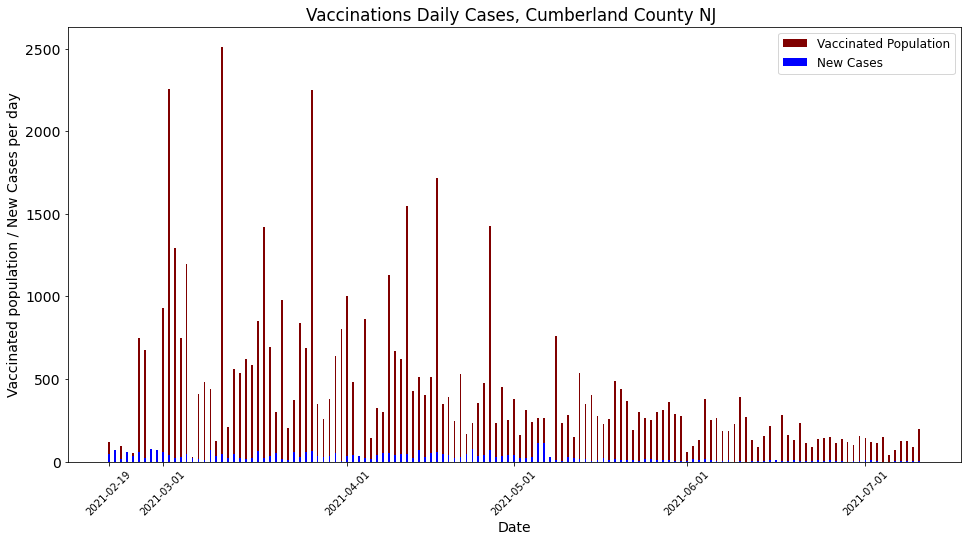

In [332]:
x_axis = county_y["Date"]
values = county_y['Vaccination Iniciated by Day']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
p1_C = plt.bar(x_axis, values, color ='maroon', width = 0.3)
p2_C = plt.bar(x_axis, county_y['Daily Cases'], color ='blue', width = 0.3)
 
plt.xlabel("Date")
plt.ylabel("Vaccinated population / New Cases per day")
plt.xticks(['2021-02-19','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=45)
plt.title("Vaccinations Daily Cases, Cumberland County NJ ")
plt.legend((p1_C[0], p2_C[0]), ('Vaccinated Population', 'New Cases'), fontsize=12)


plt.savefig("../Images/Vaccinaction_Cumberland.png")

plt.show()

### Regression (Vaccinations vs Cases) 

In [333]:
# Morris completed
#plot: setting x_values, y_values 
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]


In [334]:
# Morris completed
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.05x +37755.17


The r-squared is: 0.8673609028318877


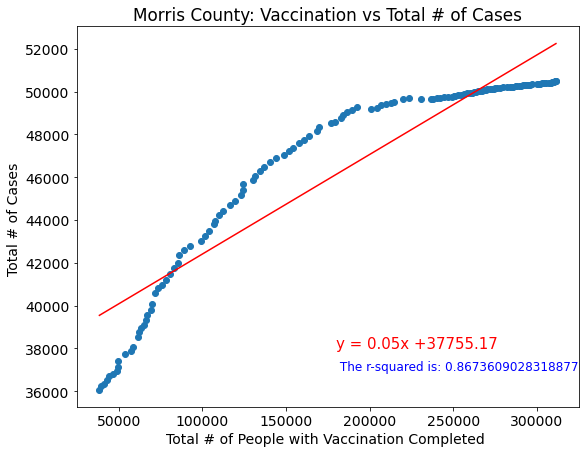

In [335]:
#Morris completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_x["Vaccination Completed"]
y_values =  county_x["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases ")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(180000,38000),fontsize=15,color="red")
plt.text(180000,37000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear_regr_Vaccinaction_Morris.png")

plt.show()

In [336]:
#Pearson's correlation coefficient Morris County - between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_x.iloc[:,6]
cases_total = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.98


In [337]:
#Pearson's correlation coefficient - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases
import scipy.stats as st

vacc_init = county_x.iloc[:,5]
cases_total1 = county_x.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


In [338]:
# Cumberland completed
#plot: setting x_values, y_values 
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]


In [339]:
# Cumberland completed
# Performed a linear regression on Vaccination vs New Cases
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values, creating line equation string
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

y = 0.06x +13920.91


The r-squared is: 0.9799645384811047


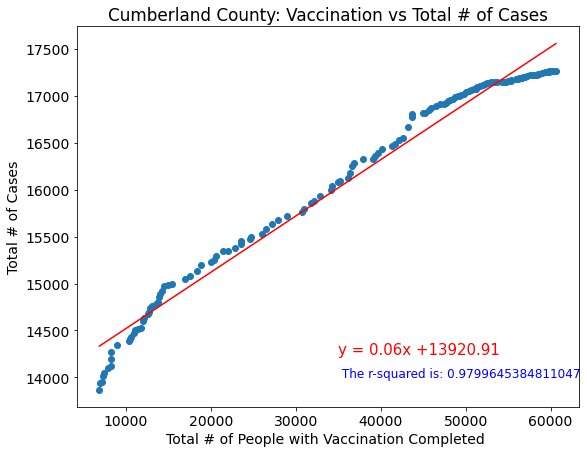

In [340]:
# Cumberland completed
# Create Plot
plt.figure(figsize=(9,7))
x_values = county_y["Vaccination Completed"]
y_values =  county_y["Total New Cases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Total # of Cases")
plt.ylabel("Total # of Cases")
plt.xlabel("Total # of People with Vaccination Completed ")

plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
plt.savefig("../Images/Linear_regr_Vaccinaction_Cumberland.png")

plt.show()

In [341]:
#Pearson's correlation coefficient Cumberland- between people fully vaccinated (vacc. completed) vs total # of cases
import scipy.stats as st

vacc_compl = county_y.iloc[:,6]
cases_total = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination completed  and the total number of cases is {round(st.pearsonr(vacc_compl,cases_total)[0],2)}")

The correlation coefficient between vaccination completed  and the total number of cases is 0.99


In [342]:
#Pearson's correlation coefficient Cumberland - between people vaccinated with 1-dose (vacc.initiated) vs total # of cases

vacc_init = county_y.iloc[:,5]
cases_total1 = county_y.iloc[:,5]
print(f"The correlation coefficient between vaccination initiated  and the total number of cases is {round(st.pearsonr(vacc_init ,cases_total1)[0],2)}")

The correlation coefficient between vaccination initiated  and the total number of cases is 1.0


## Regression by County, NJ (all counties)
    

In [313]:
# counties in NJ for linear regression calculation 
county_list =percent_vaccine['county'].unique()
county_list

array(['Morris County', 'Somerset County', 'Cape May County',
       'Bergen County', 'Middlesex County', 'Hunterdon County',
       'Mercer County', 'Burlington County', 'Monmouth County',
       'Camden County', 'Sussex County', 'Union County',
       'Gloucester County', 'Atlantic County', 'Hudson County',
       'Essex County', 'Passaic County', 'Warren County', 'Salem County',
       'Ocean County', 'Cumberland County'], dtype=object)

Morris County
The r-squared is: 0.8673609028318877
Somerset County
The r-squared is: 0.8566204077396138
Cape May County
The r-squared is: 0.9695213910129404
Bergen County
The r-squared is: 0.8855183589921752
Middlesex County
The r-squared is: 0.802150730558651
Hunterdon County
The r-squared is: 0.8782777995456805
Mercer County
The r-squared is: 0.8920197175930423
Burlington County
The r-squared is: 0.8966351964296966
Monmouth County
The r-squared is: 0.8562633963912234
Camden County
The r-squared is: 0.9639723455466386
Sussex County
The r-squared is: 0.8912988936725165
Union County
The r-squared is: 0.845860263767051
Gloucester County
The r-squared is: 0.9716363410678356
Atlantic County
The r-squared is: 0.9318829635544598
Hudson County
The r-squared is: 0.7505337599018855
Essex County
The r-squared is: 0.7698372056426235
Passaic County
The r-squared is: 0.8627411335195405
Warren County
The r-squared is: 0.9131944318080092
Salem County
The r-squared is: 0.9658248055961188
Ocean County


C:\Users\dasa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,County,R-squared,Line Equation
0,Morris County,[0.8673609028318877],[y = 0.05x +37755.17]
1,Somerset County,[0.8566204077396138],[y = 0.04x +23291.54]
2,Cape May County,[0.9695213910129404],[y = 0.05x +6910.82]
3,Bergen County,[0.8855183589921752],[y = 0.06x +78150.04]
4,Middlesex County,[0.802150730558651],[y = 0.04x +75270.21]
5,Hunterdon County,[0.8782777995456805],[y = 0.05x +7030.37]
6,Mercer County,[0.8920197175930423],[y = 0.03x +28296.63]
7,Burlington County,[0.8966351964296966],[y = 0.04x +35256.82]
8,Monmouth County,[0.8562633963912234],[y = 0.06x +57784.46]
9,Camden County,[0.9639723455466386],[y = 0.05x +42947.25]


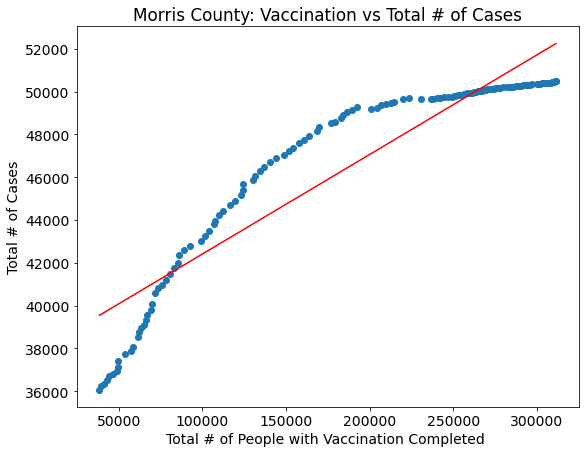

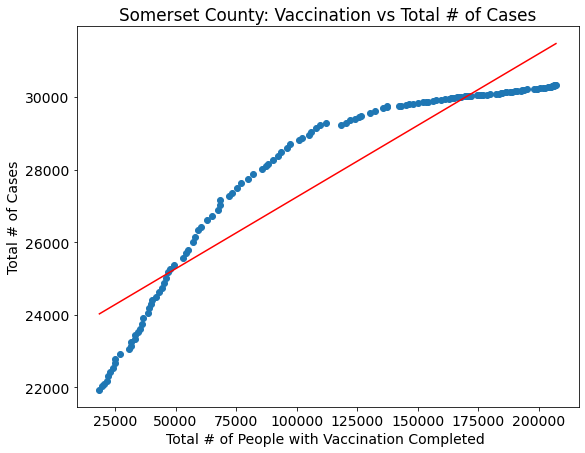

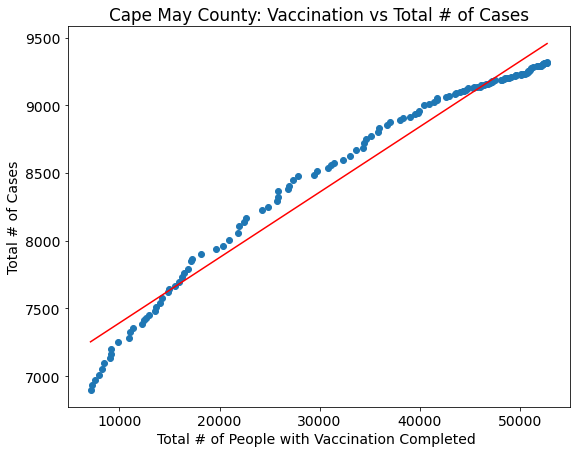

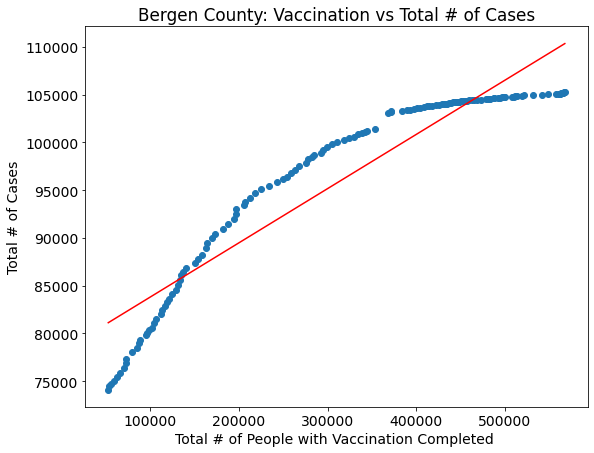

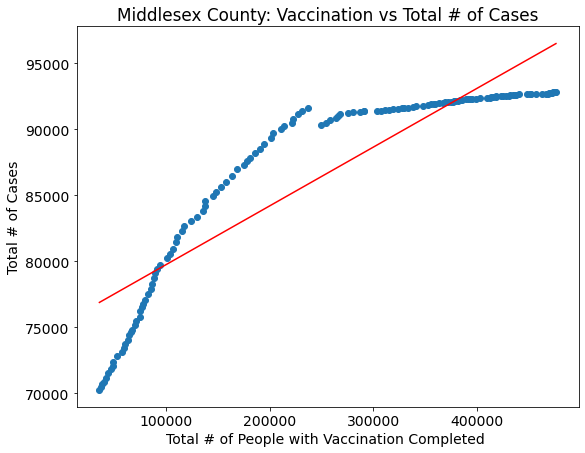

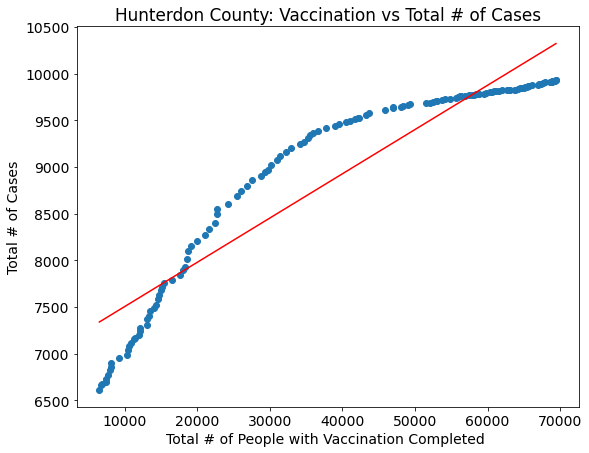

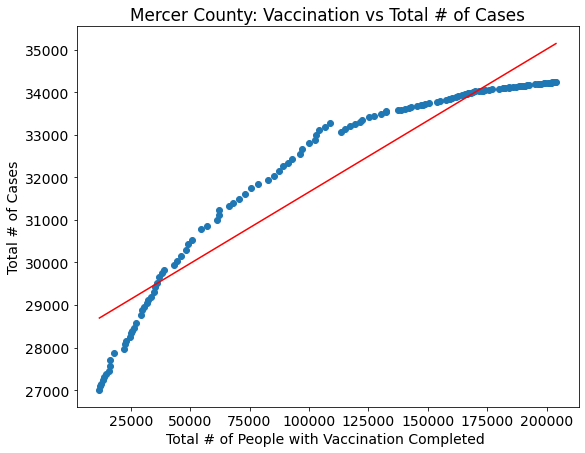

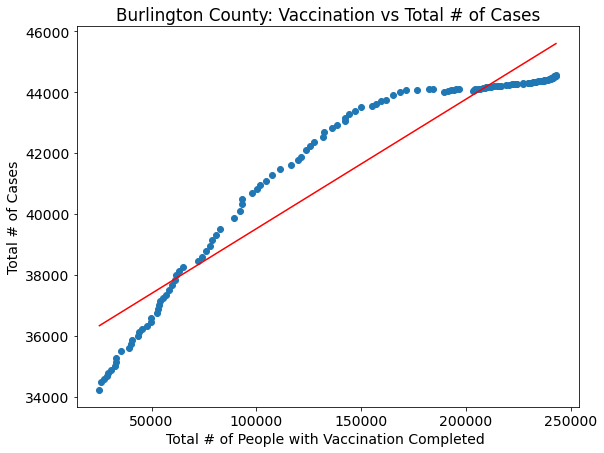

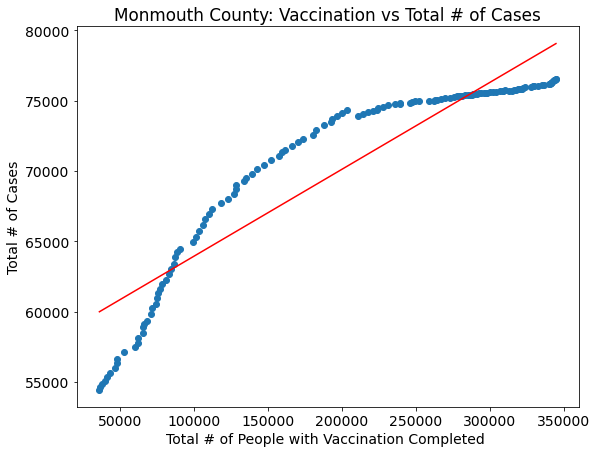

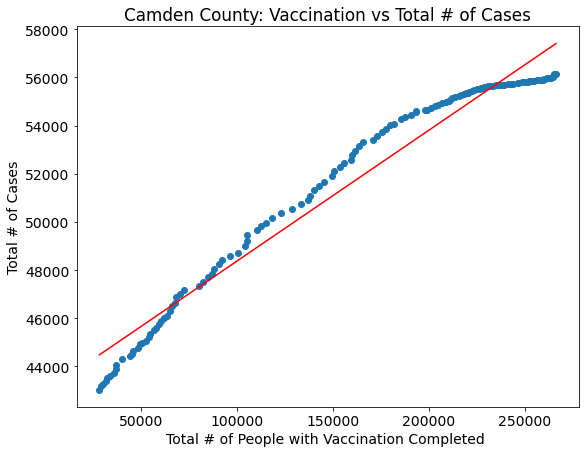

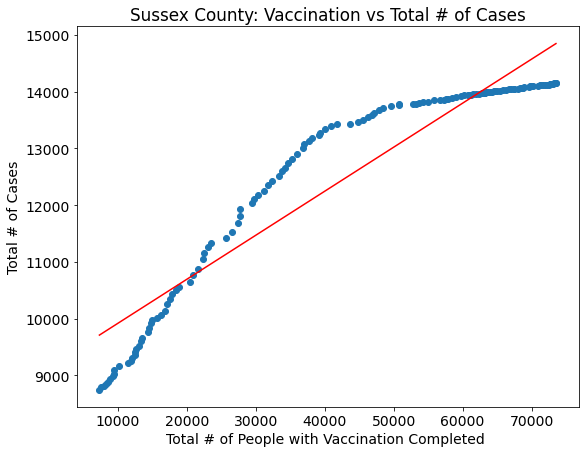

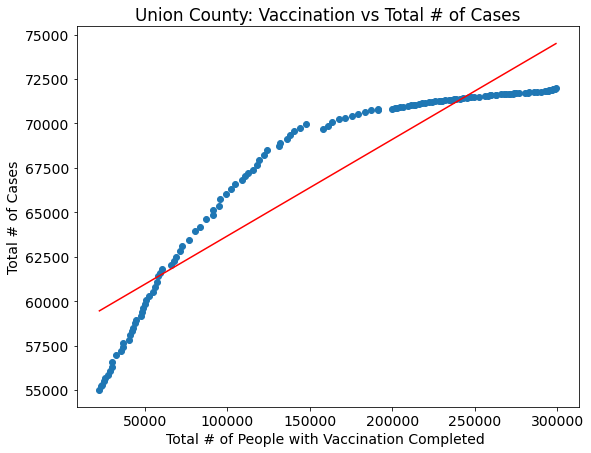

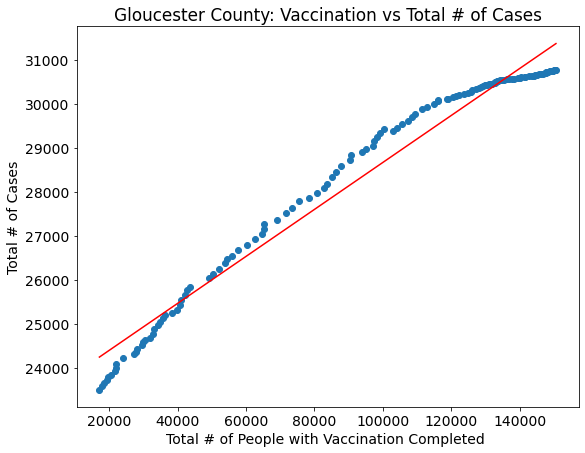

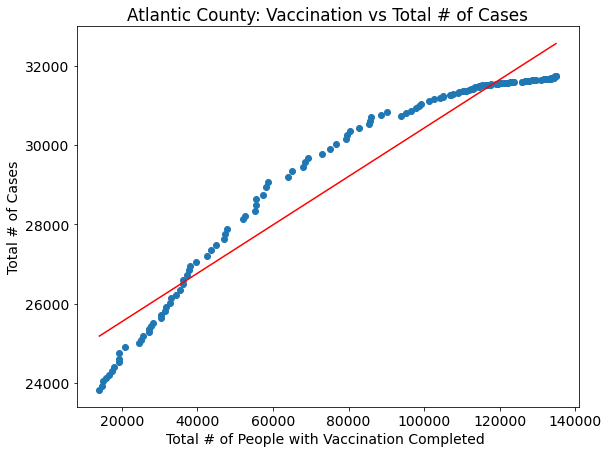

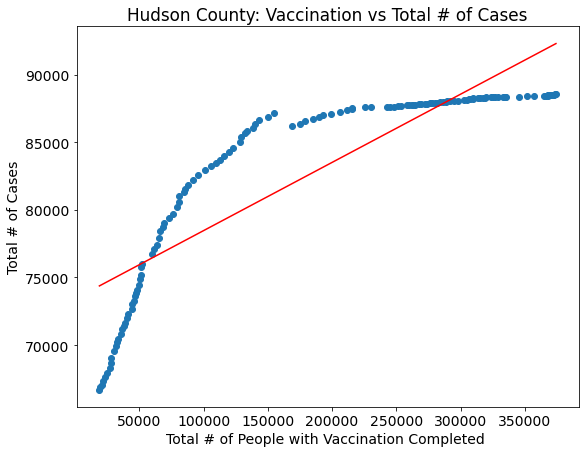

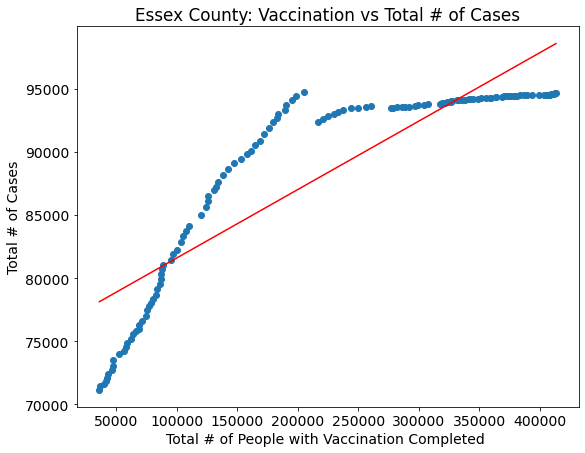

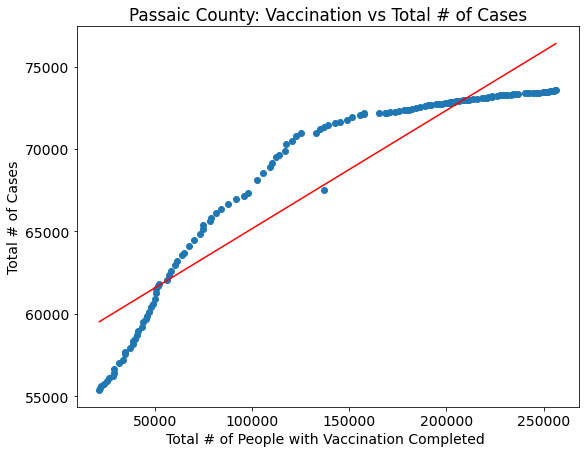

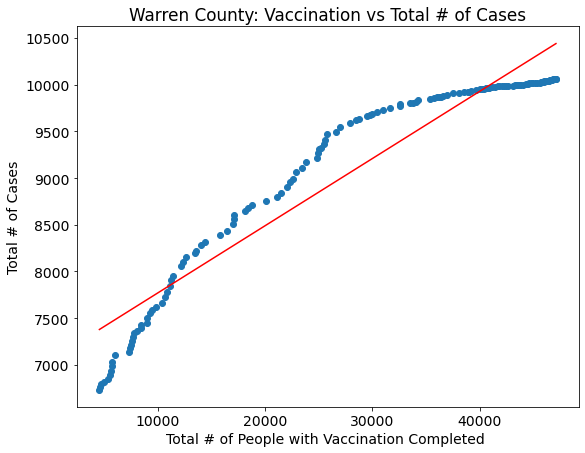

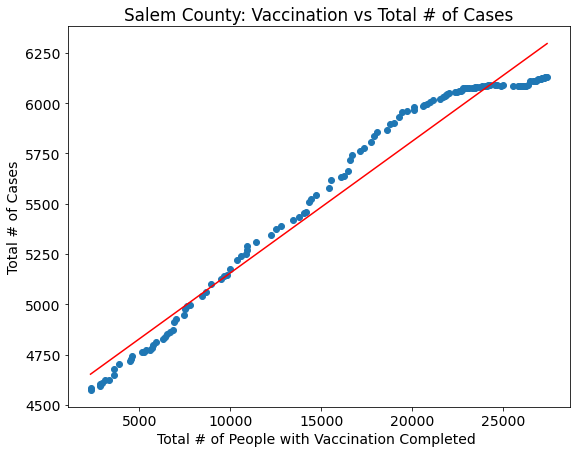

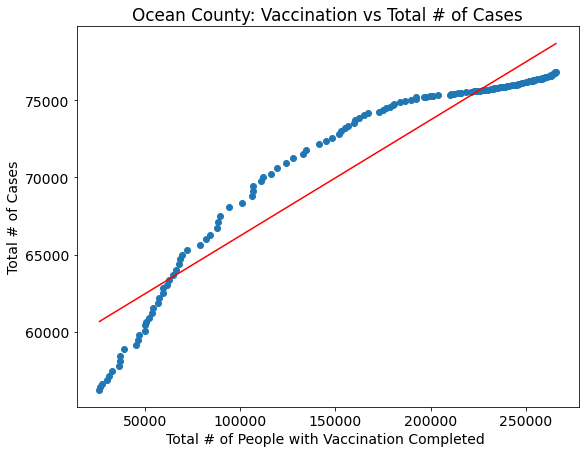

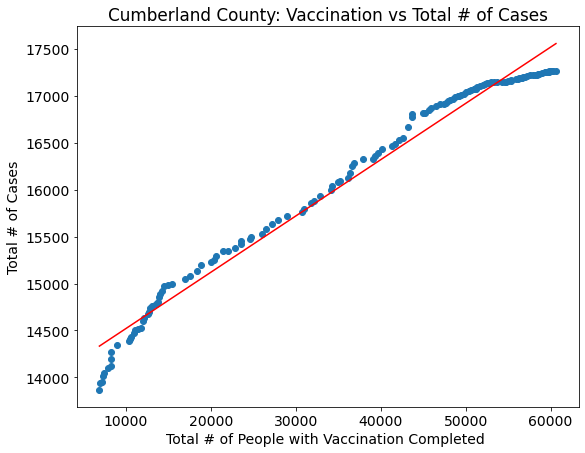

In [315]:
#Any County in NJ (from county_list) 
R_V = []
line_equation = []

for onecounty in county_list:
    print(onecounty)
    
    one_county = nc_vaccine_df.loc[nc_vaccine_df ['County'] == onecounty]

    #plot: setting x_values, y_values 
    x_values =one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]

    from scipy import stats
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values, creating line equation string
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    line_equation.append([line_eq])
    #print(line_eq)

    # Create Plot
    plt.figure(figsize=(9,7))
    x_values = one_county["Vaccination Completed"]
    y_values =  one_county["Total New Cases"]
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(onecounty + ": Vaccination vs Total # of Cases")
    plt.ylabel("Total # of Cases")
    plt.xlabel("Total # of People with Vaccination Completed ")

    #plt.annotate(line_eq,(35000,14250),fontsize=15,color="red")

    print(f"The r-squared is: {rvalue**2}")
    R_V.append([rvalue**2])
    
    #plt.text(35000,14000, (f" The r-squared is: {rvalue**2}"), fontsize = 12, color ="b")
    #plt.savefig("../Images/Linear_regr_Vaccinaction_"+onecounty+".png")
    
Linear_Regression_Values =pd.DataFrame({'County':county_list,'R-squared': R_V, 'Line Equation': line_equation})    
Linear_Regression_Values

In [318]:
lin_regress_csv_data = Linear_Regression_Values.to_csv('LinRegress.csv', index = False)
